### Fauna em Perigo no Brasil 

Esta análise foi feita através de uma base de dados do Ministério do Meio Ambiente e Mudança do Clima. 
Através dela, busca-se: 
- Entender quais são as espécies mais ameaçadas;
- O nível de ameaça por território (estado, bioma); 
- Quais são essas ameaças;
- Organizar e resumir dados; 

In [ ]:
%pip install pandas 
%pip install matplotlib 
%pip install seaborn

In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
dataset = pd.read_csv('lista-de-especies-ameacas-2020.csv', sep=';')

In [11]:
dataset.head()

,Fauna/Flora,Grupo,Família,Espécie (Simplificado),Nome Comum,Categoria de Ameaça,Sigla Categoria de Ameaça,Bioma,Principais Ameaças,Presença em Áreas Protegidas,Plano de Ação Nacional para Conservação (PAN),Ordenamento Pesqueiro,Nível de Proteção na Estratégia Nacional,Espécie exclusiva do Brasil,Estados de Ocorrência
0,Fauna,Aves,Cracidae,Aburria jacutinga,Jacutinga,Em Perigo (EN),EN,Cerrado; Mata Atlântica,Agropecuária; Assentamento Humano:cidades; Ext...,Sim,Não,Não,4.0,Não,BA; ES; MG; PR; RJ; RS; SC; SP
1,Fauna,Invertebrados Terrestres,Coenagrionidae,Aceratobasis cornicauda,Libélula,Vulnerável (VU),VU,Mata Atlântica,Agropecuária; Assentamento Humano:cidades; Pol...,Sim,Não,Não,2.0,Sim,BA; ES
2,Fauna,Invertebrados Terrestres,Coenagrionidae,Aceratobasis mourei,Libélula,Em Perigo (EN),EN,Mata Atlântica,Agropecuária; Assentamento Humano:cidades,Sim,Não,Não,2.0,Sim,ES
3,Fauna,Invertebrados Terrestres,Hypogastruridae,Acherontides eleonorae,Colêmbolo,Em Perigo (EN),EN,Mata Atlântica,Mudanca Na Dinamica Das Especies Nativas; Outr...,Sim,Não,Não,3.0,Sim,PR; SP
4,Fauna,Peixes Marinhos,Achiridae,Achirus mucuri,Solha,Vulnerável (VU),VU,Mata Atlântica,Extracao Direta:Caça/Pesca; Outras Atividades ...,Sim,Não,Não,1.0,Sim,BA


In [12]:
# Informações básicas sobre o dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Fauna/Flora                                    1173 non-null   object 
 1   Grupo                                          1173 non-null   object 
 2   Família                                        1173 non-null   object 
 3   Espécie (Simplificado)                         1173 non-null   object 
 4   Nome Comum                                     1173 non-null   object 
 5   Categoria de Ameaça                            1173 non-null   object 
 6   Sigla Categoria de Ameaça                      1173 non-null   object 
 7   Bioma                                          1173 non-null   object 
 8   Principais Ameaças                             1173 non-null   object 
 9   Presença em Áreas Protegidas                   1173 

### Espécies e Ameaças

In [65]:
#Mapeamento das espécies ameaçadas e seus nomes comuns 
especies_nomes = dataset.groupby(['Espécie (Simplificado)', 'Nome Comum', 'Sigla Categoria de Ameaça']).size().reset_index(name='Quantidade')
especies_nomes_sorted = especies_nomes.sort_values(by='Quantidade', ascending=False)

# Exibir as primeiras 10 linhas para uma visualização melhor
especies_nomes_sorted.head(10)

,Espécie (Simplificado),Nome Comum,Sigla Categoria de Ameaça,Quantidade
1172,Zonia zonia diabo,Borboleta,EN,1
0,Aburria jacutinga,Jacutinga,EN,1
1,Aceratobasis cornicauda,Libélula,VU,1
2,Aceratobasis mourei,Libélula,EN,1
3,Acherontides eleonorae,Colêmbolo,EN,1
1156,Wilfredomys oenax,Rato-do-mato,EN,1
1155,Voltinia sanarita,Borboleta,EN,1
1154,Vireo gracilirostris,Juruviara-de-noronha,VU,1
1153,Urubitinga coronata,Águia-cinzenta,EN,1
1152,Typhochlaena seladonia,Aranha-caranguejeira,EN,1


In [ ]:
# Para entender quais são as espécies mais ameaçadas, vamos agrupar os dados por categoria de ameaça
dataset['Sigla Categoria de Ameaça'].value_counts()

Sigla da categoria da ameaça: 
- VU: Vulnerável
- EN: Em perigo
- CR: Criticamente em perigo
- CR/PEX: Provavalmente extinta 
- EX: Extinta na natureza

In [ ]:
# Contar a quantidade de cada grupo
grupo_counts = dataset['Grupo'].value_counts()
fig = plt.figure(figsize=(10, 6))

# Plotar a quantidade de cada grupo
grupo_counts.plot(kind='bar', color='green')
plt.title('Quantidade de espécies ameaçadas por grupo')
plt.xlabel('Grupo')
plt.ylabel('Quantidade')
plt.show()

In [33]:
# Tabela separando grupos de animais por categoria de ameaça
grupo_por_categoria = dataset.groupby(['Grupo', 'Sigla Categoria de Ameaça']).size()

value_counts_grupo = grupo_por_categoria.reset_index(name='Quantidade').sort_values(by='Quantidade', ascending=False)
value_counts_grupo.head(10)

,Grupo,Sigla Categoria de Ameaça,Quantidade
9,Aves,VU,120
23,Peixes Continentais,EN,112
21,Peixes Continentais,CR,99
24,Peixes Continentais,VU,98
15,Invertebrados Terrestres,EN,81
13,Invertebrados Terrestres,CR,77
7,Aves,EN,71
16,Invertebrados Terrestres,VU,69
20,Mamíferos,VU,55
28,Peixes Marinhos,VU,50


Text(0.5, 1.0, 'Porcentagem de espécies ameaçadas por grupo')

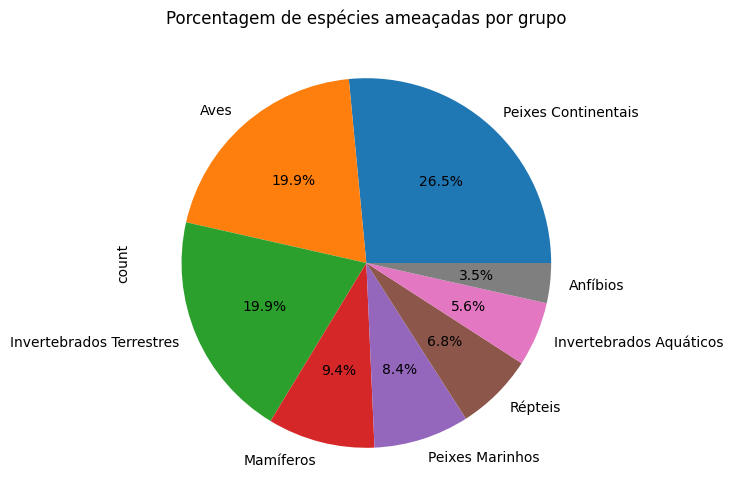

In [35]:
dataset['Grupo'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 6))
plt.title('Porcentagem de espécies ameaçadas por grupo')

Text(0.5, 1.0, 'Top 5 espécies mais ameaçadas')

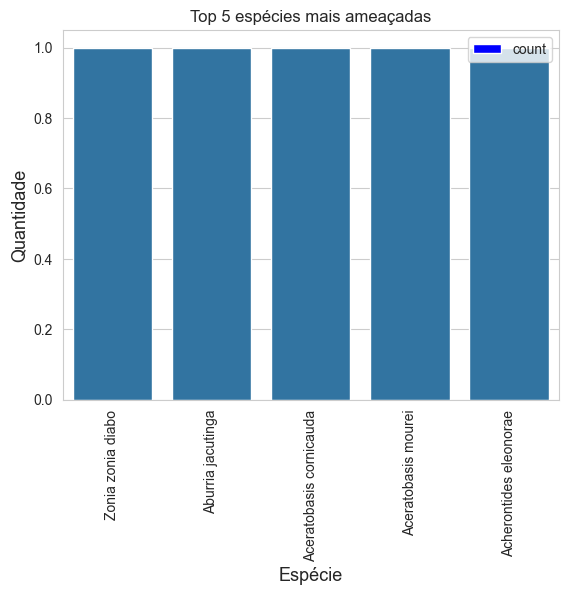

In [47]:
especies_grouped = dataset['Espécie (Simplificado)'].value_counts().head(5)

especies_grouped.plot(kind='bar', color='blue')
sns.set_style('whitegrid')
sns.barplot(x=especies_grouped.index, y=especies_grouped.values)
plt.xlabel('Espécie', fontsize=13)
plt.ylabel('Quantidade', fontsize=13)
plt.title('Top 5 espécies mais ameaçadas')

### Nível de ameaça por território (Estado e Bioma)

In [22]:
# Número de ocorrências por Estado
estado_counts = dataset['Estados de Ocorrência'].value_counts()
print(estado_counts)


Estados de Ocorrência
BA                                93
SP                                79
RS                                69
MG                                64
PA                                51
                                  ..
PR; RS                             1
BA; MG; PB; PE; SE                 1
BA; CE; MA; MG; PB; PE; PI; RN     1
AL; BA; ES; PB; PE; RJ; SE         1
GO; PR; SP                         1
Name: count, Length: 301, dtype: int64


In [20]:
bioma_counts = dataset['Bioma'].value_counts()
print(bioma_counts)

Bioma
Mata Atlântica                                                  431
Marinho                                                         159
Amazônia                                                        124
Cerrado                                                         121
Cerrado; Mata Atlântica                                          71
Caatinga                                                         47
Caatinga; Cerrado                                                39
Pampa                                                            38
Amazônia; Cerrado                                                29
Caatinga; Mata Atlântica                                         29
Mata Atlântica; Pampa                                            25
Cerrado; Pantanal                                                 9
Amazônia; Cerrado; Mata Atlântica; Pantanal                       8
Cerrado; Mata Atlântica; Pampa;                                   6
Amazônia; Caatinga; Cerrado; Mata Atlântic

([<matplotlib.patches.Wedge at 0x28d90d4f4d0>,
 [Text(-0.49820807052696375, 0.9807082738826058, 'Sim'),
  Text(0.4982079224441286, -0.9807083491099204, 'Não')],
 [Text(-0.2717498566510711, 0.5349317857541486, '65.0%'),
  Text(0.27174977587861554, -0.5349318267872293, '35.0%')])

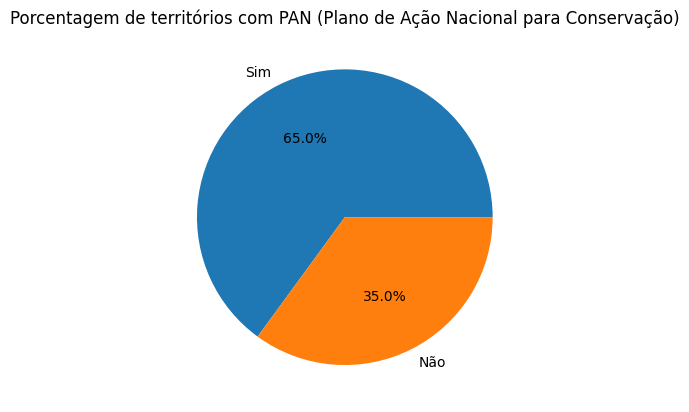

In [23]:
labels = dataset['Plano de Ação Nacional para Conservação (PAN)'].value_counts().index
sizes = dataset['Plano de Ação Nacional para Conservação (PAN)'].value_counts().values

fig, ax = plt.subplots()
ax.title.set_text('Porcentagem de territórios com PAN (Plano de Ação Nacional para Conservação)')
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

In [24]:
# Mapeamento de principais ameaças
dataset['Principais Ameaças'].value_counts()

Principais Ameaças
Agropecuária                                                                                                                                                                                  161
Agropecuária; Assentamento Humano:cidades                                                                                                                                                      82
Extracao Direta:Caça/Pesca                                                                                                                                                                     76
Outras Atividades Econômicas:Energia                                                                                                                                                           68
Assentamento Humano:cidades                                                                                                                                                                    47
           

Text(0.5, 1.0, '5 maiores fatores de ameaça')

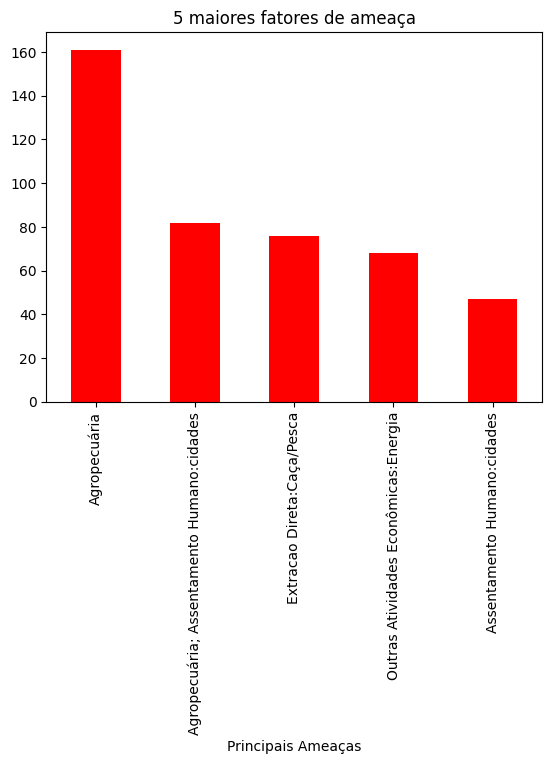

In [31]:
dataset['Principais Ameaças'].value_counts().head(5).plot(kind='bar', color='red')
plt.title('5 maiores fatores de ameaça')